### This projects aim to create a segmentation for customer in airlines company based on their spending and how frequent they use the airlines with goal to create more perzonalized approach, create effective marketing campaign and better airlines services.

## Data Processing

In [ ]:
 import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Import Data

In [ ]:
flight = pd.read_csv('flight.csv')
flight.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
flight= flight.drop('MEMBER_NO', axis = 1)

# Data Understanding

## General Information

In [ ]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           62988 non-null  object 
 1   FIRST_FLIGHT_DATE  62988 non-null  object 
 2   GENDER             62985 non-null  object 
 3   FFP_TIER           62988 non-null  int64  
 4   WORK_CITY          60719 non-null  object 
 5   WORK_PROVINCE      59740 non-null  object 
 6   WORK_COUNTRY       62962 non-null  object 
 7   AGE                62568 non-null  float64
 8   LOAD_TIME          62988 non-null  object 
 9   FLIGHT_COUNT       62988 non-null  int64  
 10  BP_SUM             62988 non-null  int64  
 11  SUM_YR_1           62437 non-null  float64
 12  SUM_YR_2           62850 non-null  float64
 13  SEG_KM_SUM         62988 non-null  int64  
 14  LAST_FLIGHT_DATE   62988 non-null  object 
 15  LAST_TO_END        62988 non-null  int64  
 16  AVG_INTERVAL       629

1. The dataset contains 6964 entries (rows) and 23 columns (features).

2. The columns are of different data types:
integer (int64)
float (float64)
object (usually representing string or categorical data).

In [ ]:
num_unique_ffp_tier = flight['FFP_TIER'].unique()
print(num_unique_ffp_tier)

[6 5 4]


We can include FFP_TIER as categorical data instead of numerical because the data represents the tier of customers based on the frequent flyer program.

In [ ]:
flight['FFP_TIER'] = flight['FFP_TIER'].astype(dtype='object')

# Exploratory Data Analysis (EDA)

## Summary Statistics for Numerical Variables

In [ ]:
flight.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0
MAX_INTERVAL,62988.0,166.033895,123.397180,0.0,79.000000,143.000000,228.000000,728.0
EXCHANGE_COUNT,62988.0,0.319775,1.136004,0.0,0.000000,0.000000,0.000000,46.0



1. AGE
The average customer age is 44.7 years, with most customers between 38 and 50 years old.

2. FLIGHT_COUNT
Customers have flown an average of 39.9 flights, with a wide range (3 to 213 flights).

3. BP_SUM (travel Plan) Customers have an average of 44,771.65 of travel plan, with significant variability (13,956 to 505,308).

4. SUM_YR_1 (Yearly Spending 1)
Average spending in the first year is 20,162.50, ranging from 0 to 239,560.

5. SUM_YR_2 (Yearly Spending 2)
Average spending in the second year is 22,459.85, with a range similar to the first year (0 to 234,188).

6. SEG_KM_SUM (Total Kilometers Flown)
Customers have flown an average of 62,257.70 kilometers, with a broad range (19,422 to 580,717 km).

7. LAST_TO_END (Days Since Last Flight)
The average number of days since the last flight is 41.20, with high variability (1 to 667 days).

8. AVG_INTERVAL (Average Interval Between Flights)
The average interval between flights is 22.42 days, ranging from 2 to 296.5 days.

9. MAX_INTERVAL (Maximum Interval Between Flights)
The longest interval between flights averages 107.24 days, with a wide range (6 to 572 days).

10. EXCHANGE_COUNT
The average number of exchanges is 1.62, ranging from 0 to 46.

12. avg_discount
The average discount received is 0.82, with most discounts between 0.70 and 0.86.

13. Points_Sum
The total points earned average 51,180.18, with a wide range (13,956 to 795,398 points).

14. Point_NotFlight
Non-flight points average 6.95, with a range of 0 to 140 points.




 ## Summary Statistics for Categorical and Date Variables

In [ ]:
# Get the summary statistics for categorical variables
flight.describe(include='object')

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,62988,60719,59740,62962,62988,62988
unique,3068,3406,2,3,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,4,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,58066,9386,17509,57748,62988,959


## Univariate Analysis

1. For numerical data, we can use a histogram to visualize the data distribution. The number of bins should be chosen appropriately to represent the data well.
2. For categorical data, we can use a bar plot to visualize the frequency of each category.

## Univariate Analysis: Numeric Data

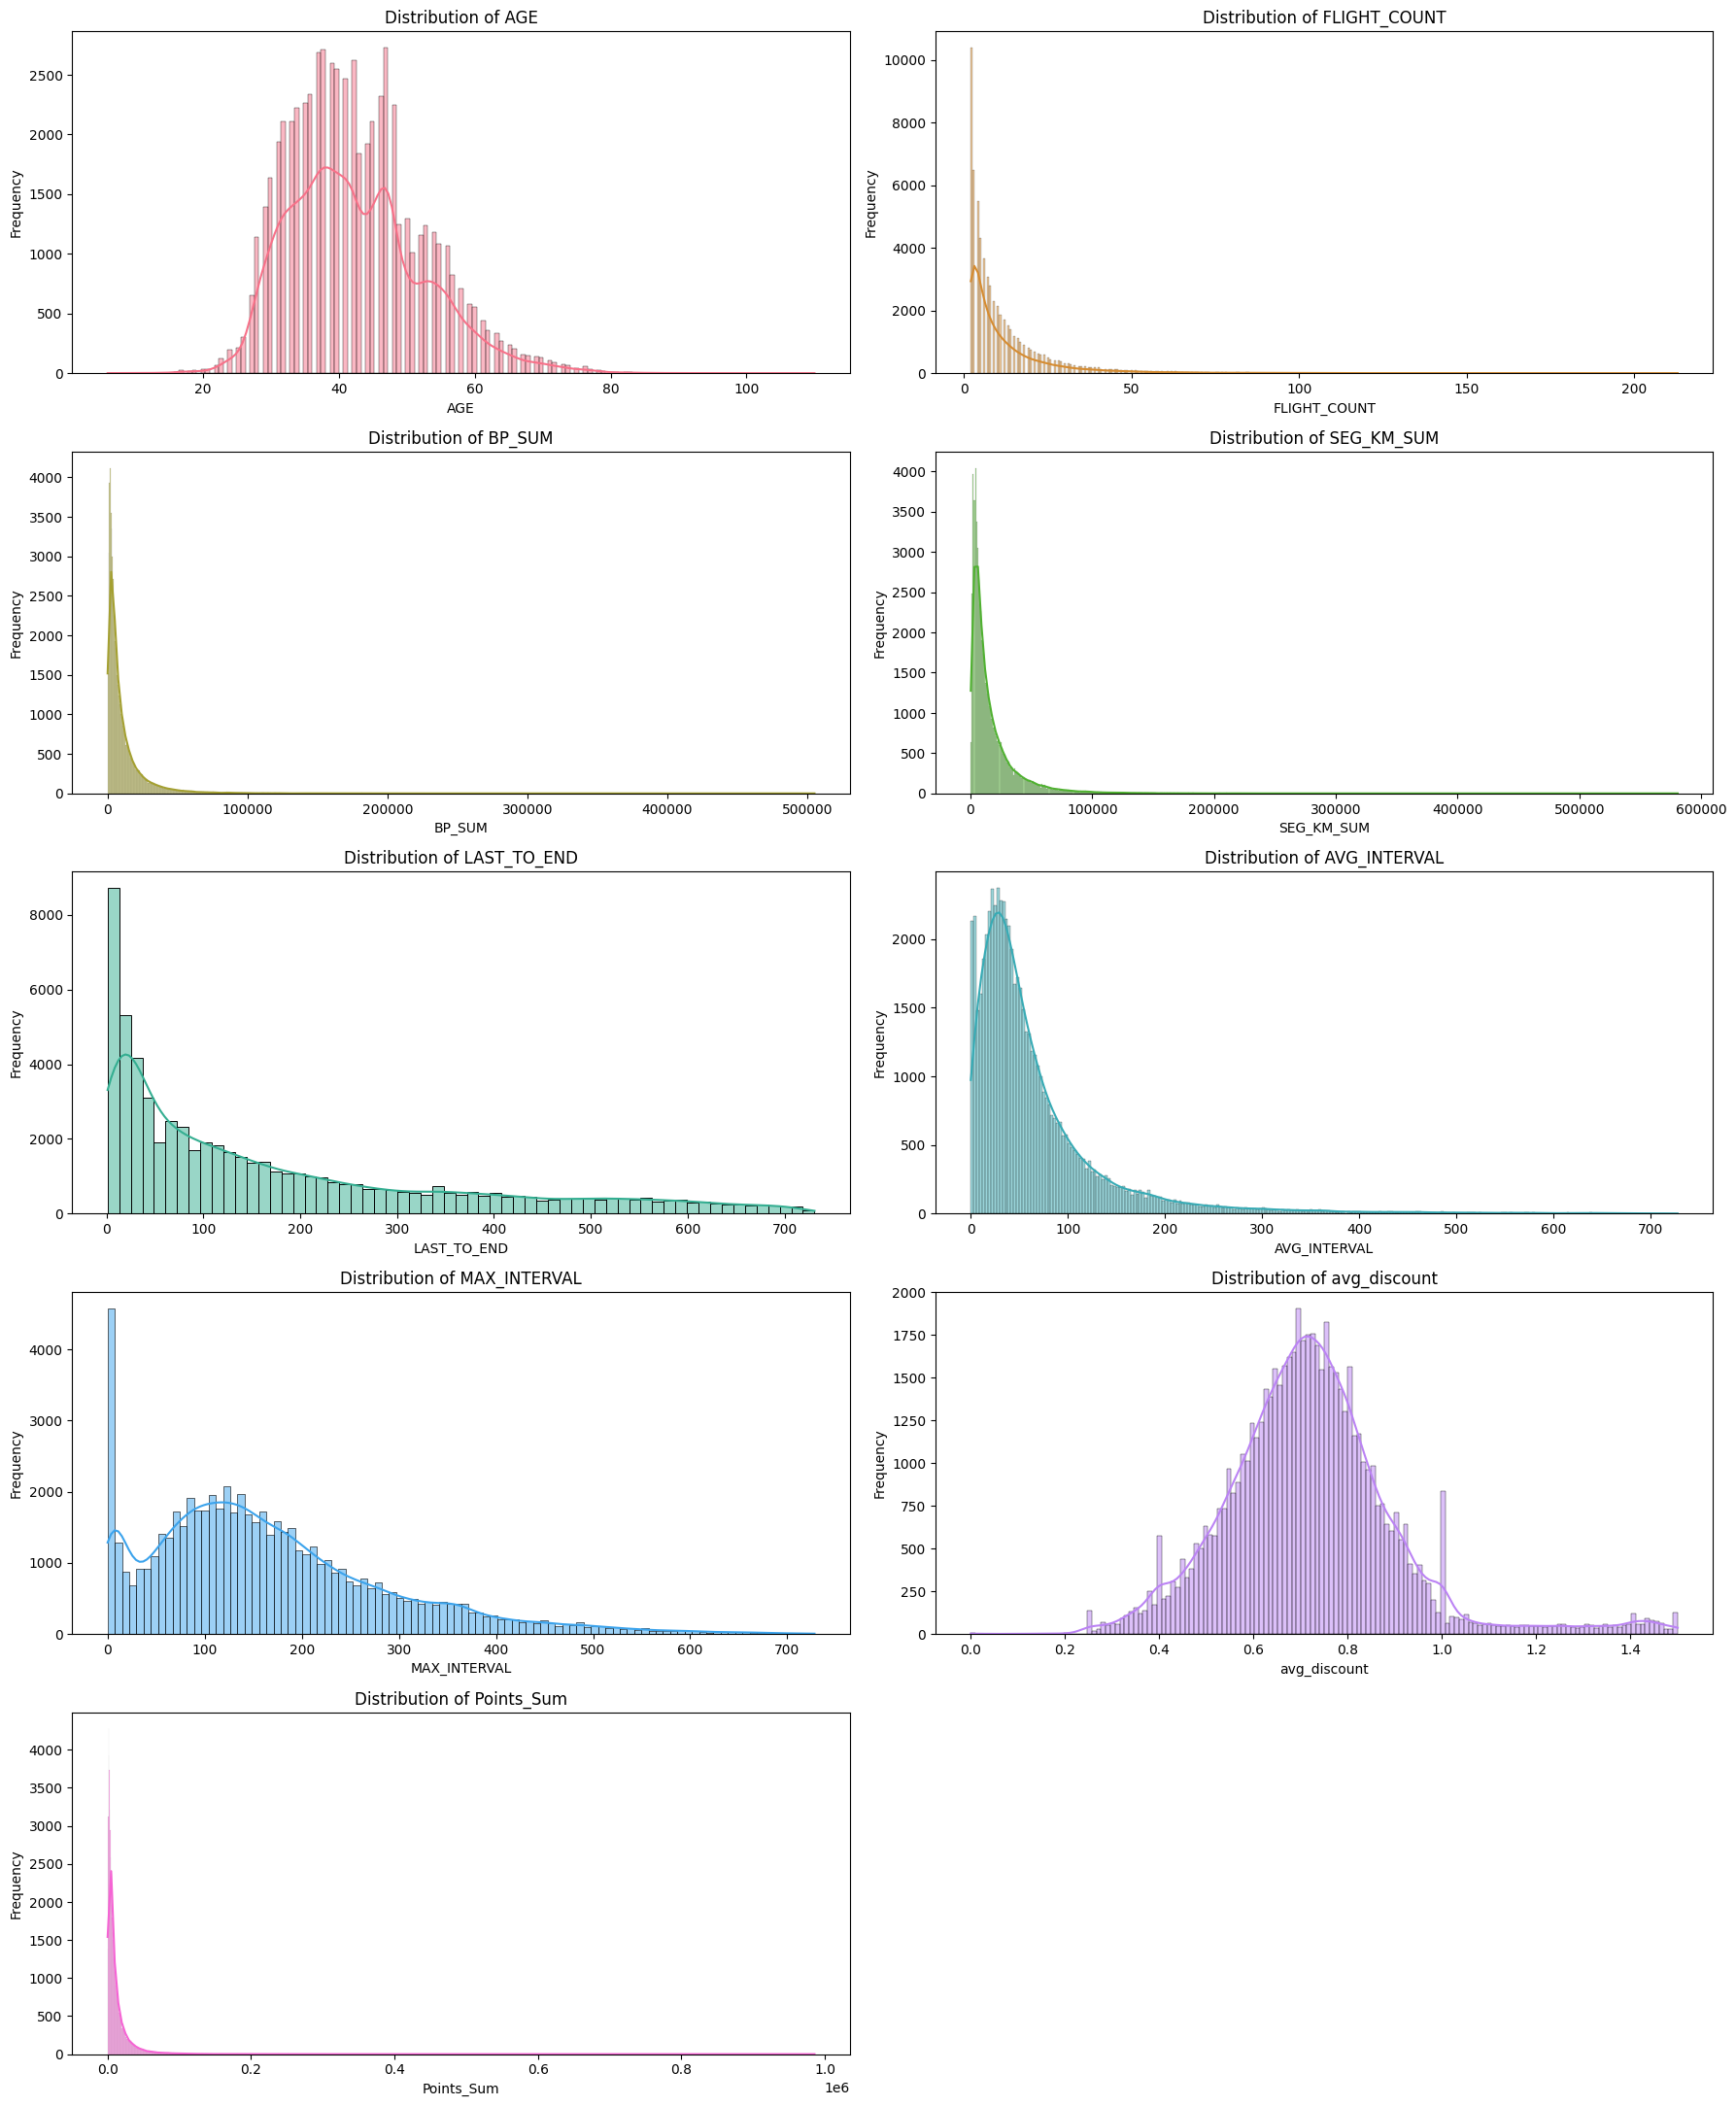

In [ ]:
# Select numerical features based on data type
flight_drop = flight.drop(['EXCHANGE_COUNT', 'Point_NotFlight', 'SUM_YR_1', 'SUM_YR_2'], axis=1)
numerical_features = flight_drop.select_dtypes(include=['number']).columns

# Set up the matplotlib figure
plt.figure(figsize=(18, 30))

# Define a color palette
colors = sns.color_palette('husl', len(numerical_features))

# Loop through the numerical features and create a subplot for each
for i, (feature, color) in enumerate(zip(numerical_features, colors)):
    plt.subplot(7, 2, i+1)
    sns.histplot(flight[feature], kde=True, color=color)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

1. Most of the numerical data distibution showing positive skew. The mean is usually greater than the median due to the influence of the higher values.

2. There are posibility of outlier that causing data distribution positively skew.

3. only `age` and `average discount` that normaly distribtuted.

## Univariate Analysis: Categorical Data

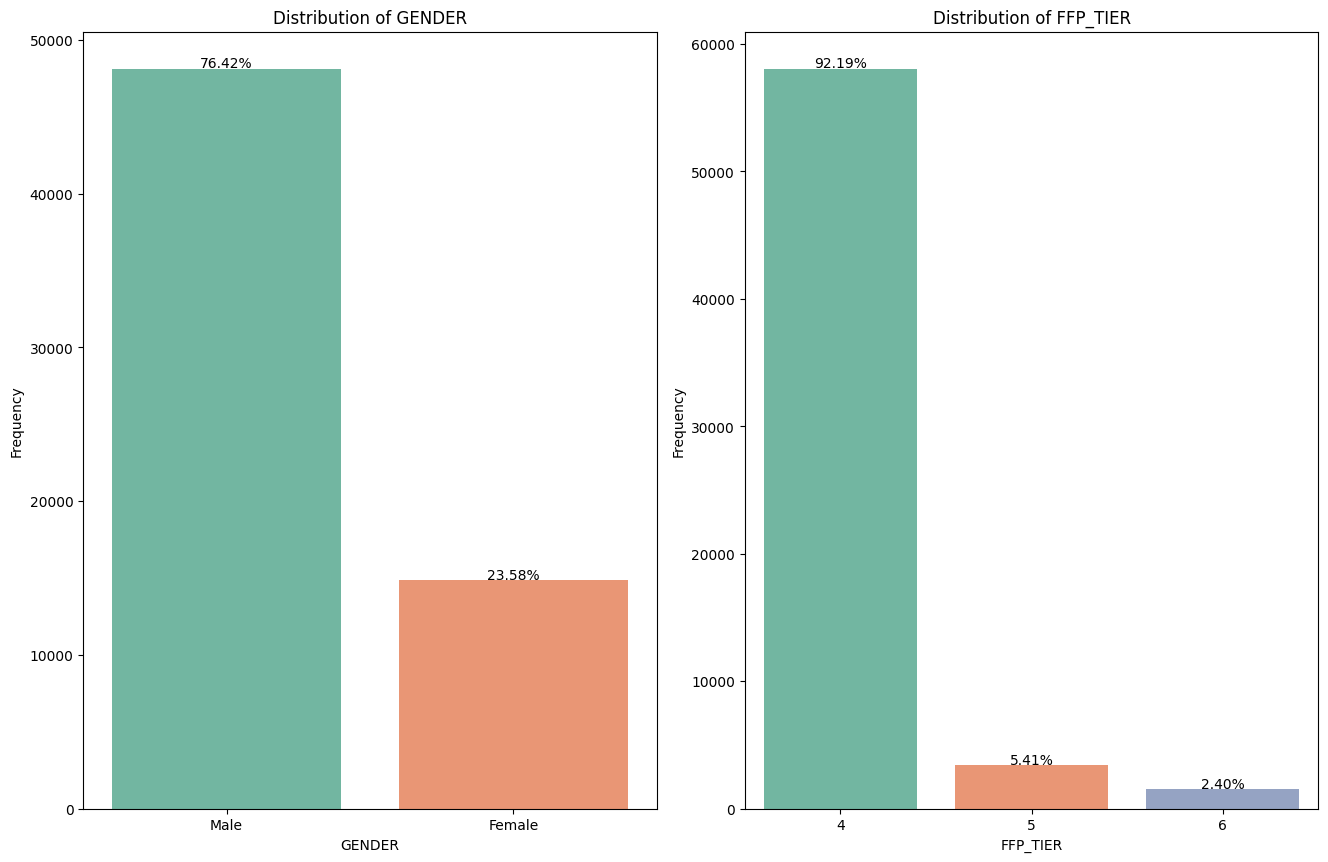

In [ ]:
# Define the categorical columns
categorical_columns = ['GENDER', 'FFP_TIER']

# Set up the matplotlib figure
plt.figure(figsize=(20, 25))

# Loop through the categorical columns and create a subplot for each
for i, column in enumerate(categorical_columns, start=1):
    plt.subplot(3, 3, i)
    sns.countplot(data=flight, x=column, palette='Set2')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Add percentage text on top of each bar
    total = len(flight[column])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 2, height + 100, f'{height / total:.2%}', ha='center')

plt.tight_layout()
plt.show()

1. The majority of customers are male, contributing to 76.42% of the total.
2. The most common tier in the frequent flyer program constitutes 92.19%.

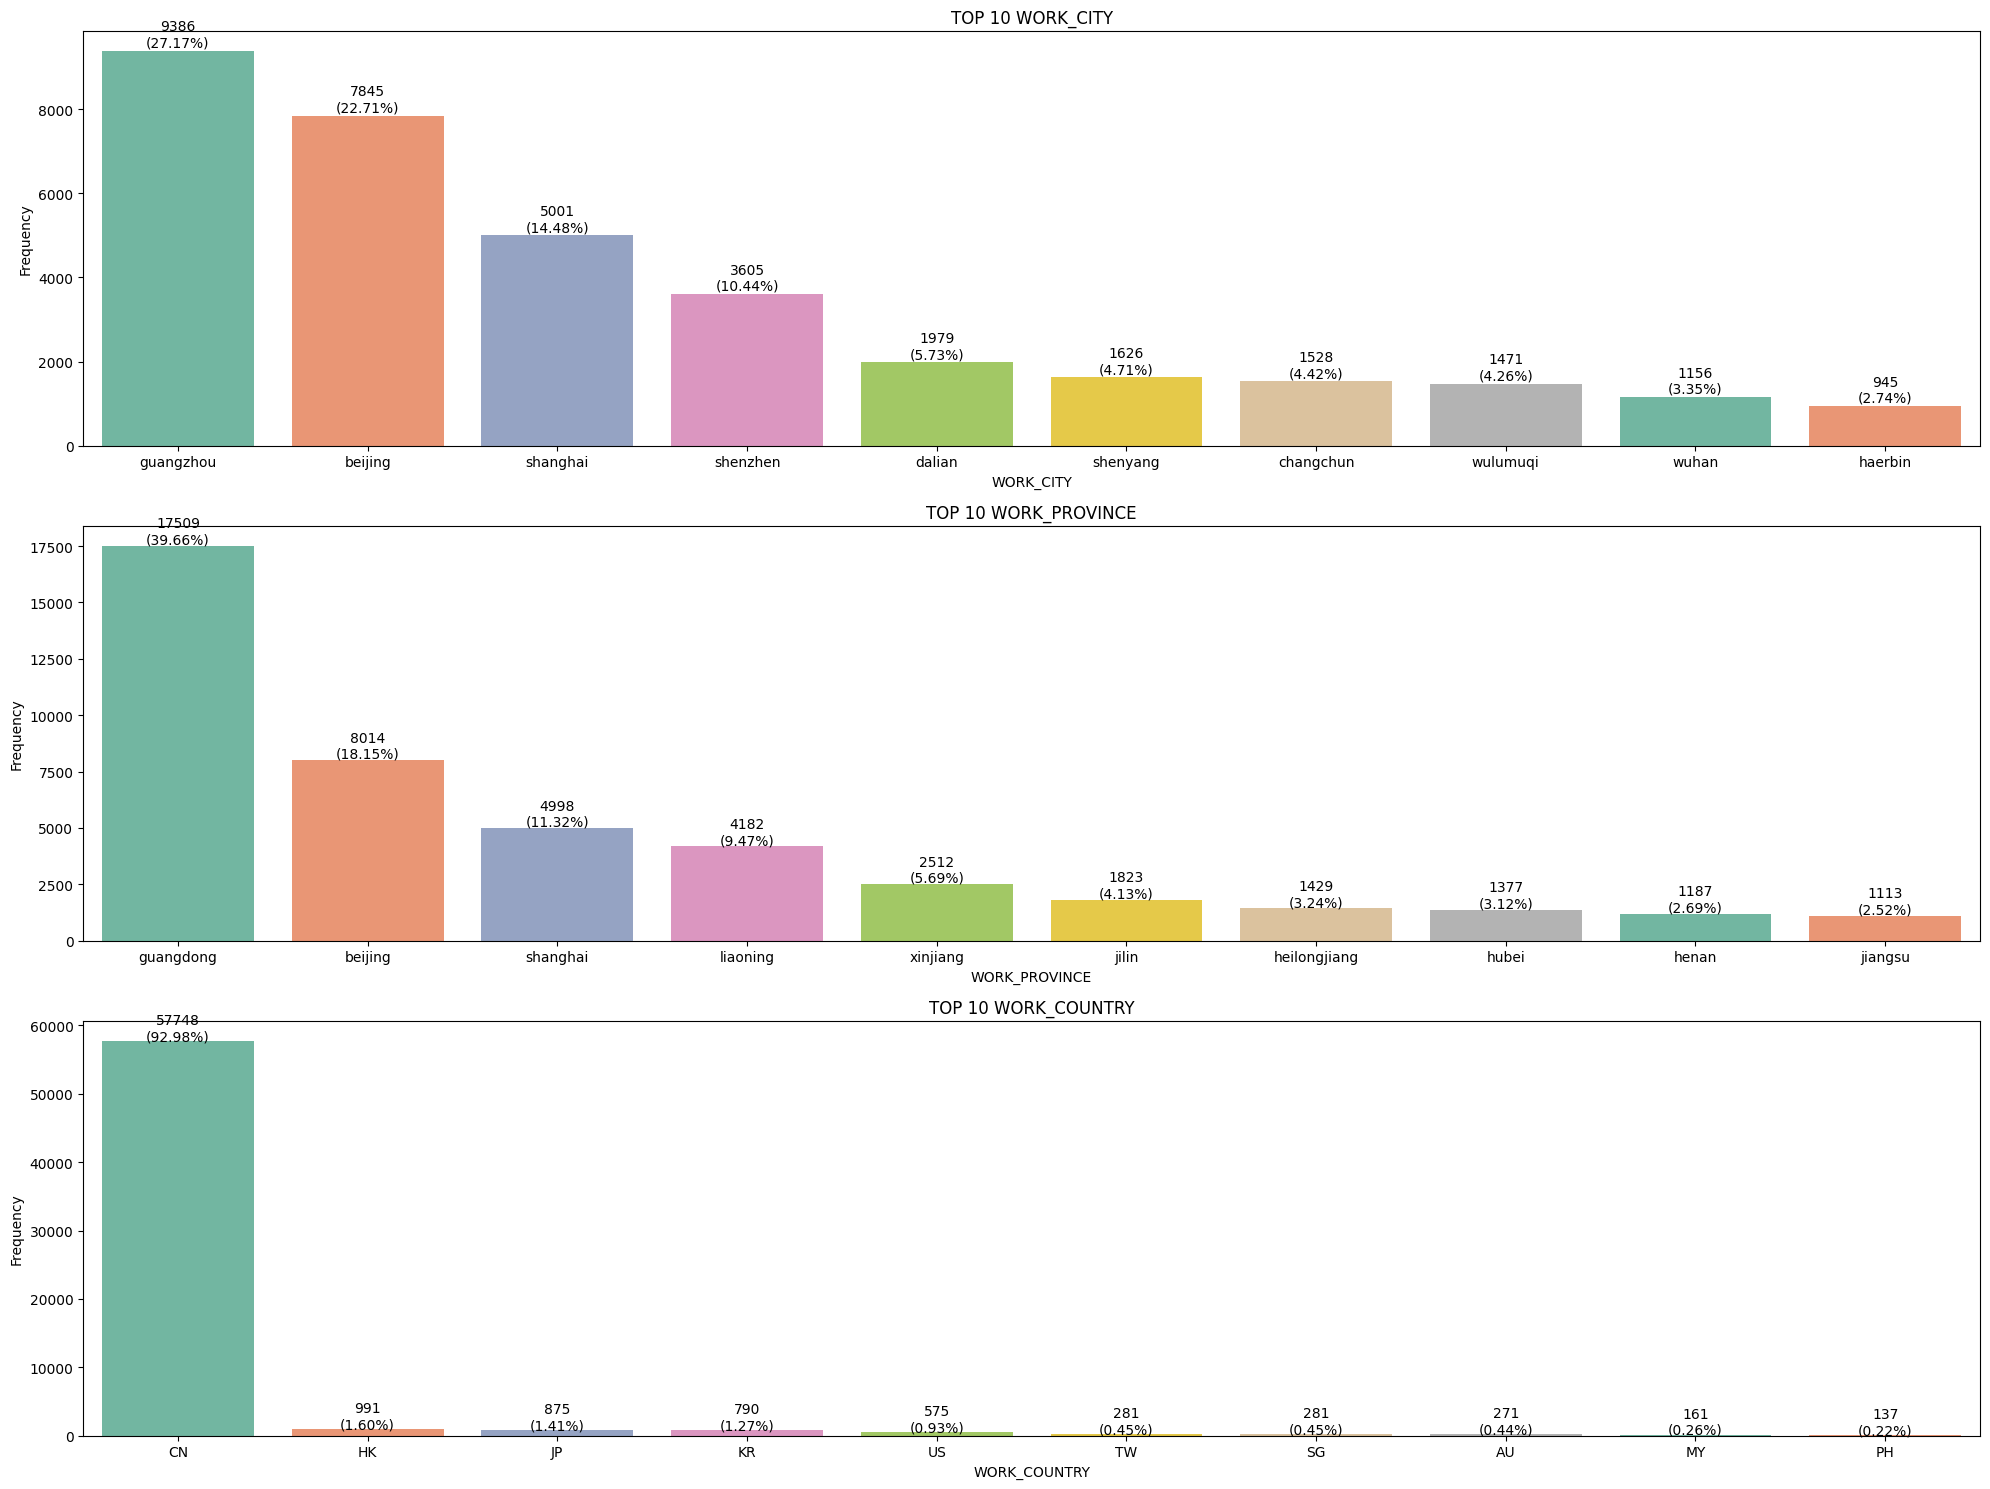

In [ ]:
# Define the categorical columns
categorical_columns = ['WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Loop through the categorical columns and create a subplot for each
for i, column in enumerate(categorical_columns, start=1):
    # Get the top 10 categories
    top_10_categories = flight[column].value_counts().nlargest(10)

    # Filter the DataFrame to include only the top 10 categories
    flight_filtered = flight[flight[column].isin(top_10_categories.index)]

    plt.subplot(3, 1, i)
    sns.countplot(data=flight_filtered, x=column, order=top_10_categories.index, palette='Set2')
    plt.title(f'TOP 10 {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Add count label on top of each bar
    total = len(flight_filtered[column])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 2, height + 100, f'{int(height)}\n({height / total:.2%})', ha='center')

plt.tight_layout()
plt.show()

Most customers are from China, totaling 57,748 (92.98%), with the origin province being Guangdong at 17,509 (39.66%) and the origin city being Guangzhou at 9,386 (27.17%).

## Bivariate Analysis

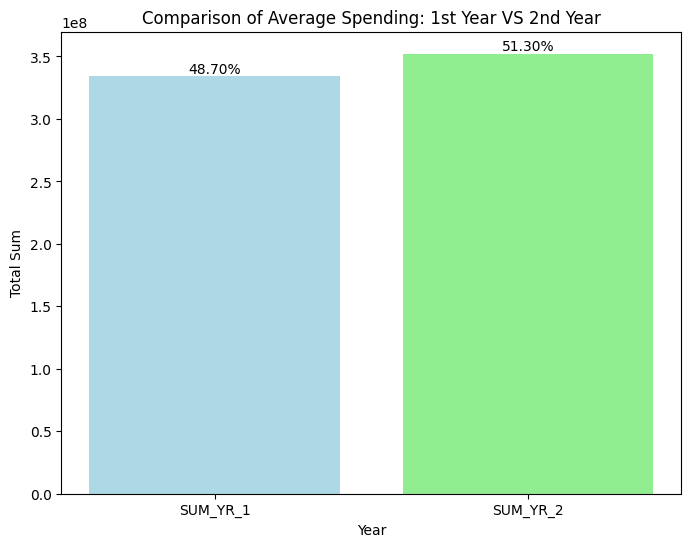

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Plot SUM_YR_1 and SUM_YR_2
bars = plt.bar(['SUM_YR_1', 'SUM_YR_2'], [flight['SUM_YR_1'].sum(), flight['SUM_YR_2'].sum()], color=['lightblue', 'lightgreen'])
plt.title('Comparison of Average Spending: 1st Year VS 2nd Year')
plt.xlabel('Year')
plt.ylabel('Total Sum')

# Add percentage above each bar
total_sum = flight['SUM_YR_1'].sum() + flight['SUM_YR_2'].sum()
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5000, f'{height / total_sum * 100:.2f}%', ha='center', va='bottom')

plt.show()

The average spending increases from the first year to the second year.

## Multivariate Analysis

In [ ]:
numerical_features = flight.select_dtypes(include=['number'])
corr = numerical_features.corr()
corr

,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
AGE,1.000000,0.073246,0.100501,0.111815,0.083743,0.087254,-0.025600,-0.024613,0.009382,0.029604,0.133235,0.074757,-0.092282
FLIGHT_COUNT,0.073246,1.000000,0.788379,0.748032,0.794838,0.850411,-0.404999,-0.316833,-0.188682,0.502501,0.139377,0.747092,0.291880
BP_SUM,0.100501,0.788379,1.000000,0.850624,0.884632,0.921724,-0.319039,-0.246764,-0.147953,0.530021,0.307245,0.923271,0.244254
SUM_YR_1,0.111815,0.748032,0.850624,1.000000,0.663009,0.804125,-0.186173,-0.243309,-0.145206,0.488029,0.268884,0.788354,0.235095
SUM_YR_2,0.083743,0.794838,0.884632,0.663009,1.000000,0.849195,-0.423420,-0.246290,-0.154905,0.468149,0.234652,0.826666,0.237954
SEG_KM_SUM,0.087254,0.850411,0.921724,0.804125,0.849195,1.000000,-0.369509,-0.280746,-0.155508,0.507819,0.108393,0.853014,0.259037
LAST_TO_END,-0.025600,-0.404999,-0.319039,-0.186173,-0.423420,-0.369509,1.000000,-0.108594,-0.343939,-0.169717,-0.021036,-0.292027,-0.124074
AVG_INTERVAL,-0.024613,-0.316833,-0.246764,-0.243309,-0.246290,-0.280746,-0.108594,1.000000,0.724392,-0.130226,-0.038814,-0.220946,-0.075967
MAX_INTERVAL,0.009382,-0.188682,-0.147953,-0.145206,-0.154905,-0.155508,-0.343939,0.724392,1.000000,-0.089417,-0.016392,-0.135977,-0.042843
EXCHANGE_COUNT,0.029604,0.502501,0.530021,0.488029,0.468149,0.507819,-0.169717,-0.130226,-0.089417,1.000000,0.112589,0.578581,0.396115


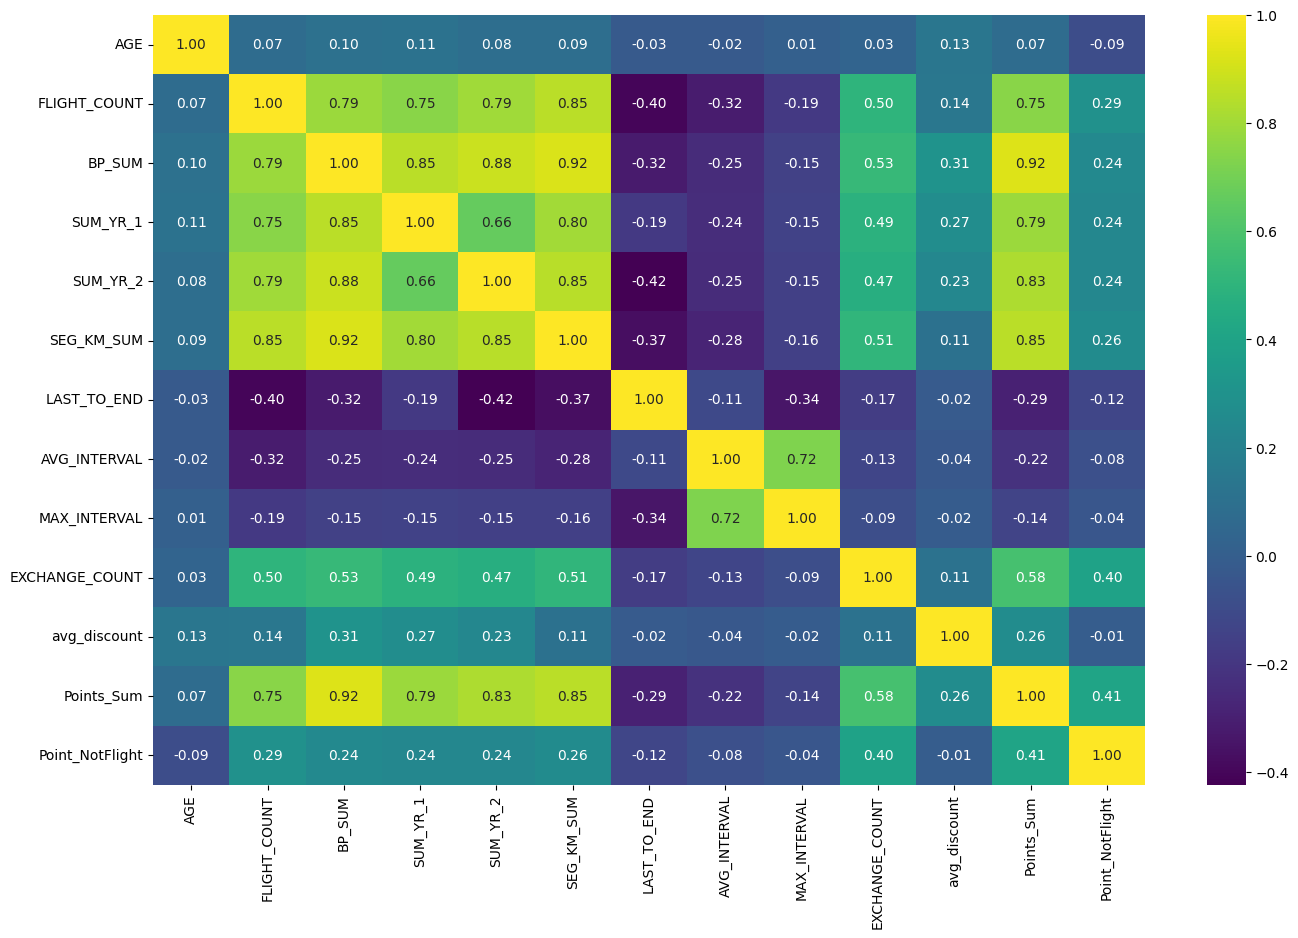

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = flight.select_dtypes(include=['number'])
corr = numerical_features.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis")
plt.show()

Strong Positive Correlations:
*   FLIGHT_COUNT and BP_SUM: 0.788
*   BP_SUM and SUM_YR_1: 0.851
*   BP_SUM and SUM_YR_2: 0.885
*   FLIGHT_COUNT and SUM_YR_2: 0.795
*   FLIGHT_COUNT and SEG_KM_SUM: 0.850
*   SEG_KM_SUM and BP_SUM: 0.922


# Data Preprocessing

## Handling Missing Value

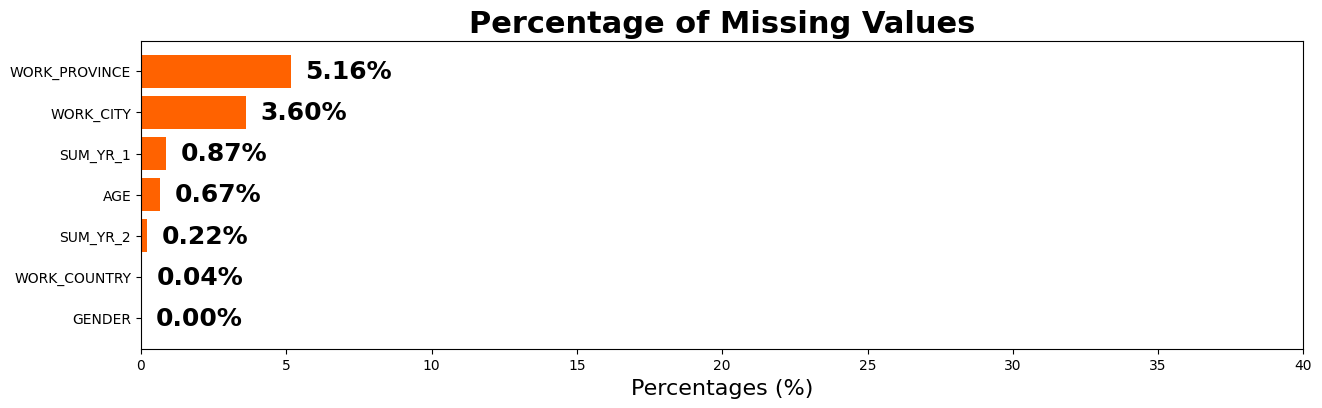

(None,)

In [ ]:
# Calculating the percentage of missing values for each column
missing_data = flight.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / flight.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show(),

The highest percentage of missing values is just 5.16%, so we can choose to use the drop missing value method to remove it.

In [ ]:
flight = flight.dropna()

In [ ]:
# Verifying the removal of missing values
flight.isnull().sum().sum()

0

## Feature Engineering

##RFM Features

RFM is a method used for analyzing customer value and segmenting the customer base. It is an acronym that stands for:

1. Recency (R): This metric indicates how recently a customer has made a purchase. A lower recency value means the customer has purchased more recently, indicating higher engagement with the brand.

2. Frequency (F): This metric signifies how often a customer makes a purchase within a certain period. A higher frequency value indicates a customer who interacts with the business more often, suggesting higher loyalty or satisfaction.

3. Monetary (M): This metric represents the total amount of money a customer has spent over a certain period. Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value.

Here's how we can map the provided features to the RFM model:

1. Recency:
LAST_TO_END: This feature represents the number of days since the customer's last flight. A lower number indicates more recent activity, which is crucial for recency analysis.

2. Frequency:
FLIGHT_COUNT: This feature indicates how many flights the customer has taken. Higher values represent more frequent engagement with the airline.

3. Monetary:
SUM_YR_1 and SUM_YR_2: These features represent the customer's spending in two different years. Combining these will give a good estimate of the total monetary value of each customer.

In [ ]:
flight['Total_Spending'] = flight['SUM_YR_1'] + flight['SUM_YR_2']

# Selecting the RFM features
rfm = flight[['LAST_TO_END', 'FLIGHT_COUNT', 'Total_Spending']]

 # data_LRFMC data
dt_RFM = pd.DataFrame()
# data_RFM.columns = ['R', 'F','M']
dt_RFM['R'] = rfm['LAST_TO_END']
dt_RFM['F'] = rfm['FLIGHT_COUNT']
dt_RFM['M'] = rfm['Total_Spending']
dt_RFM

,R,F,M
0,1,210,473748.0
2,11,135,328600.0
3,97,23,241850.0
4,5,152,255262.0
5,79,92,189310.0
...,...,...,...
62982,437,2,0.0
62983,297,2,0.0
62984,89,4,0.0
62985,29,2,0.0


## Duplicate Values

In [ ]:
dt_RFM.duplicated().sum()

202

In [ ]:
dt_RFM = dt_RFM.drop_duplicates()

## Handling Outliers

### Data Transformation Method

In [ ]:
features = list(dt_RFM)

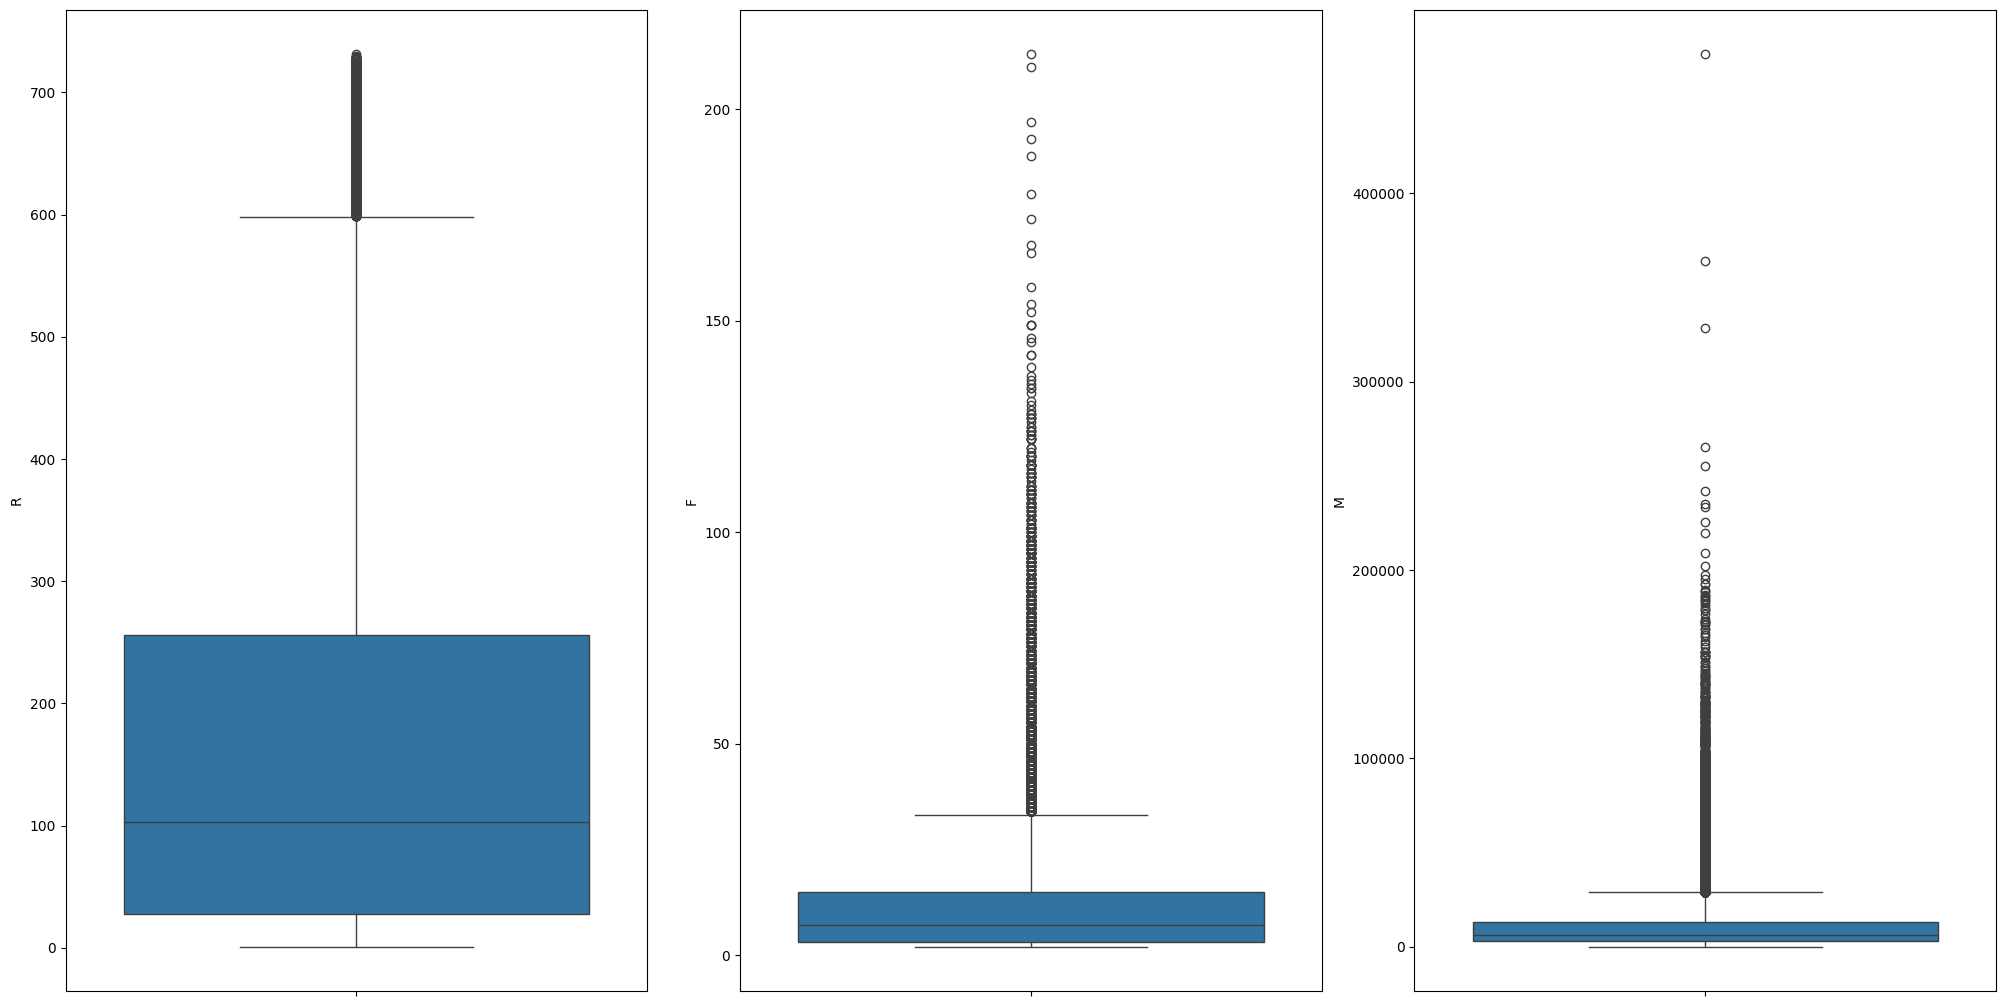

In [ ]:
#checking outliers using boxplot
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
count = 0
axs = axs.flatten()
for tar,var in dt_RFM.items():
    sns.boxplot(y=tar, data=dt_RFM, ax=axs[count])
    count= count+1
plt.tight_layout(pad=0.5, w_pad=0.78, h_pad=4.0)

In [ ]:
#outliers in percentage
for tar,var in dt_RFM.items():
    q1=var.quantile(0.25)
    q3=var.quantile(0.75)
    iqr=q3-q1
    var_col=var[(var<=q1-1.5*iqr) | (var>=q3+1.5*iqr)]
    perc=np.shape(var_col)[0]*100.0/np.shape(dt_RFM)[0]
    print("Column %s outliers = %.2f%%" % (tar, perc))

Column R outliers = 3.72%
Column F outliers = 7.53%
Column M outliers = 8.37%


In [ ]:
# Features of interest
features_of_interest = ['R', 'F', 'M']

# Log transformation
for feature in features_of_interest:
    dt_RFM[feature] = np.log10(dt_RFM[feature] + 1)  # Apply log transformation

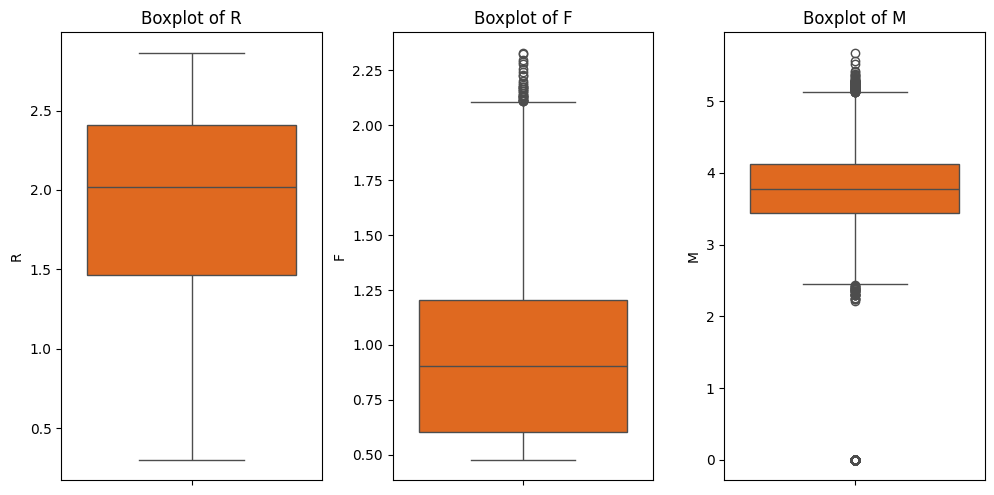

In [ ]:
ncols = 3
nrows = (len(features_of_interest) + ncols - 1) // ncols  # Calculate rows needed

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10, nrows * 5))
axs = axs.flatten()
for count, var in enumerate(features_of_interest):
    sns.boxplot(y=var, data=dt_RFM, ax=axs[count], color='#FF6200')  # Set the box color to orange
    axs[count].set_title(f'Boxplot of {var}')

plt.tight_layout(pad=0.9, w_pad=0.78, h_pad=4.0)
plt.show()

### Remove outlier based on IQR method

In [ ]:
Q1 = dt_RFM['F'].quantile(0.25)
Q3 = dt_RFM['F'].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - (1.5 * IQR)
batas_atas = Q3 + (1.5 * IQR)
filter = ((dt_RFM['F'] >= batas_bawah) & (dt_RFM['F'] <= batas_atas))
dt_RFM = dt_RFM [filter]

Q1 = dt_RFM['M'].quantile(0.25)
Q3 = dt_RFM['M'].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - (1.5 * IQR)
batas_atas = Q3 + (1.5 * IQR)
filter = ((dt_RFM['M'] >= batas_bawah) & (dt_RFM['M'] <= batas_atas))
dt_RFM = dt_RFM [filter]

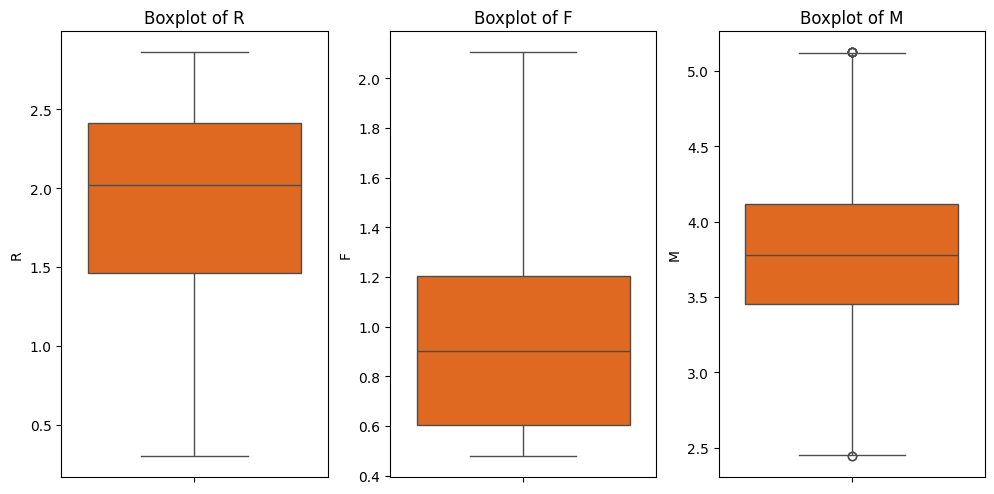

In [ ]:
ncols = 3
nrows = (len(features_of_interest) + ncols - 1) // ncols  # Calculate rows needed

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10, nrows * 5))
axs = axs.flatten()
for count, var in enumerate(features_of_interest):
    sns.boxplot(y=var, data=dt_RFM, ax=axs[count], color='#FF6200')  # Set the box color to orange
    axs[count].set_title(f'Boxplot of {var}')

plt.tight_layout(pad=0.9, w_pad=0.78, h_pad=4.0)
plt.show()

In [ ]:
#outliers in percentage
for tar,var in dt_RFM.items():
    q1=var.quantile(0.25)
    q3=var.quantile(0.75)
    iqr=q3-q1
    var_col=var[(var<=q1-1.5*iqr) | (var>=q3+1.5*iqr)]
    perc=np.shape(var_col)[0]*100.0/np.shape(dt_RFM)[0]
    print("Column %s outliers = %.2f%%" % (tar, perc))

Column R outliers = 0.00%
Column F outliers = 0.00%
Column M outliers = 0.02%


## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
dt_RFM_std = StandardScaler().fit_transform(dt_RFM)
RFM_scaled  = pd.DataFrame(dt_RFM_std, columns=list(dt_RFM))
RFM_scaled.head(10)

,R,F,M
0,-0.107147,1.465773,2.595737
1,-0.127546,1.145253,2.809711
2,-0.790870,1.782265,2.724253
3,-0.818763,2.856260,2.879537
4,-1.187054,2.007346,2.642762
5,-1.292384,1.465773,2.750273
6,-1.890583,3.054845,2.851136
7,-1.488954,1.505328,2.799310
8,-0.943341,1.651727,2.765529
9,-0.159332,0.914782,2.208763


# Modeling : K-Means Clustering

To ascertain the optimal number of clusters (k) for segmenting customers, I will explore two renowned methods:

1. Elbow Method

2. Silhouette Method

### Determining the Optimal Number of Clusters: Elbow Method

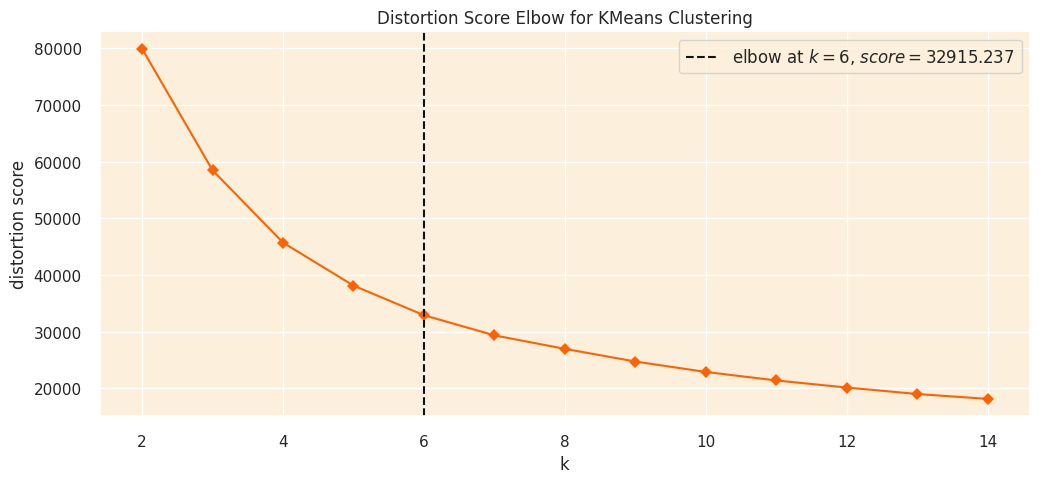

In [ ]:

from yellowbrick.cluster import KElbowVisualizer

# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)


# Fit the data to the visualizer
visualizer.fit(RFM_scaled)

# Finalize and render the figure
visualizer.show();

`Optimal k Value: Elbow Method Insights`

The optimal value of k for the KMeans clustering algorithm can be found at the elbow point. Using the YellowBrick library for the Elbow method, we observe that the suggested optimal k value is 6. However, we don't have a very distinct elbow point in this case, to choose the best k within this range, we can employ the silhouette analysis, another cluster quality evaluation method.

##Determining the Optimal Number of Clusters: Silhouette score

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(RFM_scaled)
    preds = kmeans.predict(RFM_scaled)

    score_euclidean = silhouette_score(RFM_scaled, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

<Axes: >

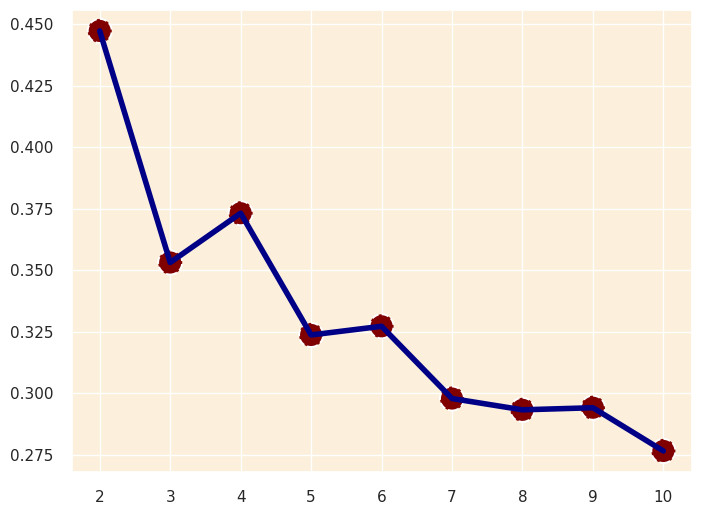

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

Based on above guidelines and after carefully considering the silhouette plots, it's clear that choosing ( k = 2) is the better option. This choice gives us clusters that are more evenly matched and well-defined, making our clustering solution stronger and more reliable.

## Clustering

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=7).fit(RFM_scaled)
RFM_scaled['cluster'] = kmeans.labels_
dt_RFM['cluster'] = kmeans.labels_

## Cluster Visualization

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(RFM_scaled)
pcs = pca.transform(RFM_scaled)

RFM_scaled_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])
RFM_scaled_pca.head()

,pc1,pc2
0,2.593301,-1.407888
1,2.536515,-1.384072
2,3.186693,-0.963971
3,3.931644,-1.319603
4,3.464538,-0.654838


Using the PCA method, we can transform the data into 2D to make it more effective for visualization.

<Axes: xlabel='pc1', ylabel='pc2'>

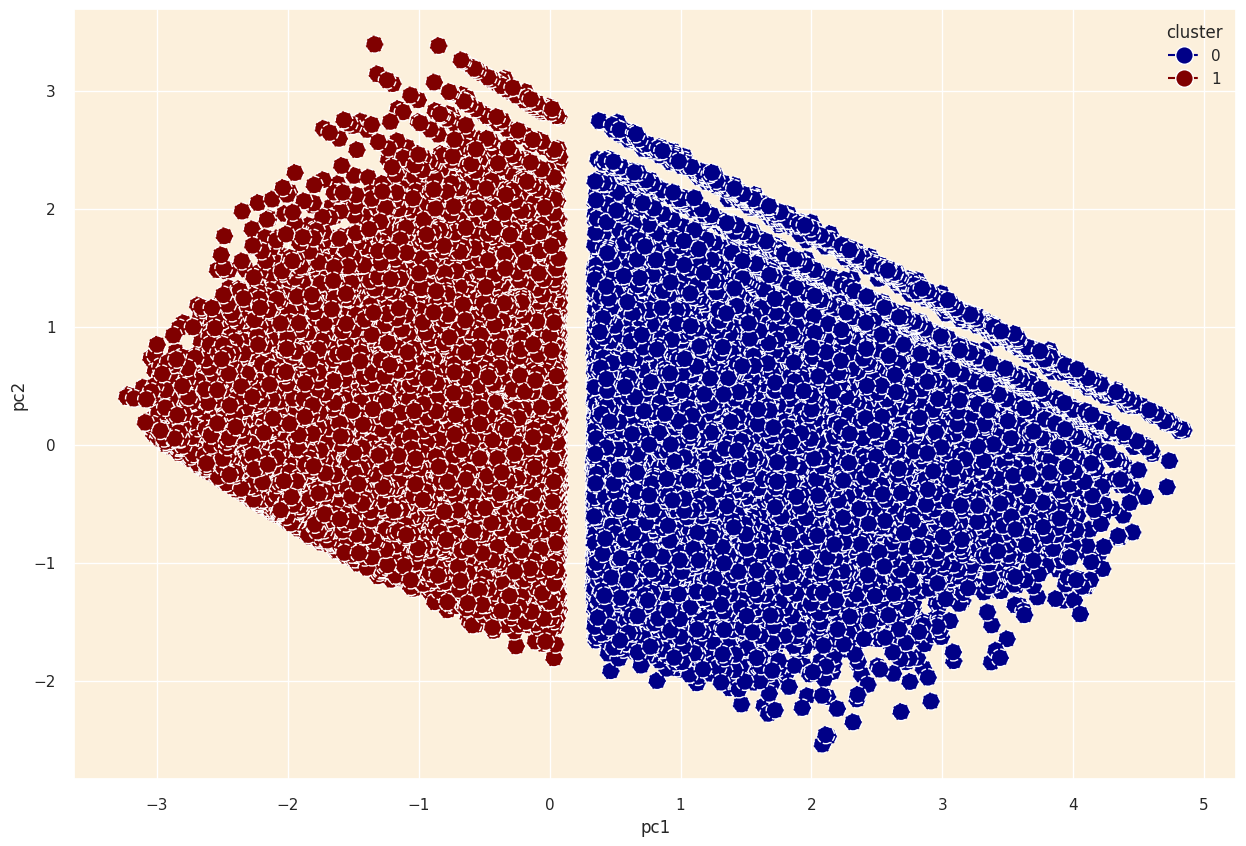

In [ ]:
RFM_scaled_pca['cluster'] = kmeans.labels_

fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="pc1", y="pc2",
    hue="cluster",
    edgecolor='white',
    linestyle='--',
    data=RFM_scaled_pca,
    palette=['#000087','#800000','#005f00',"#808000",'#808080'],
    s=160,
    ax=ax
)


# Insight - Analysis Clustering

In [ ]:
cluster_df = dt_RFM.groupby('cluster')[['R', 'F', 'M']].agg({
    'R': ['mean', 'median'],
    'F': ['mean', 'median'],
    'M': ['mean', 'median']
}).reset_index()

# Flatten the MultiIndex columns
cluster_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in cluster_df.columns.values]

cluster_df

,cluster,R_mean,R_median,F_mean,F_median,M_mean,M_median
0,0,1.432229,1.447158,1.283357,1.255273,4.202056,4.175323
1,1,2.246072,2.322219,0.703111,0.698970,3.487693,3.506776



General Insight:
1. High-value Customers (Cluster 0): These customers are more engaged, fly more frequently, and have flown more recently. They also spend more, making them highly valuable to the airline.

2. Low-value Customers (Cluster 1): These customers are less engaged, fly less frequently, and have not flown as recently. They also spend less, making them less valuable in comparison to Cluster 0.
By focusing marketing effort

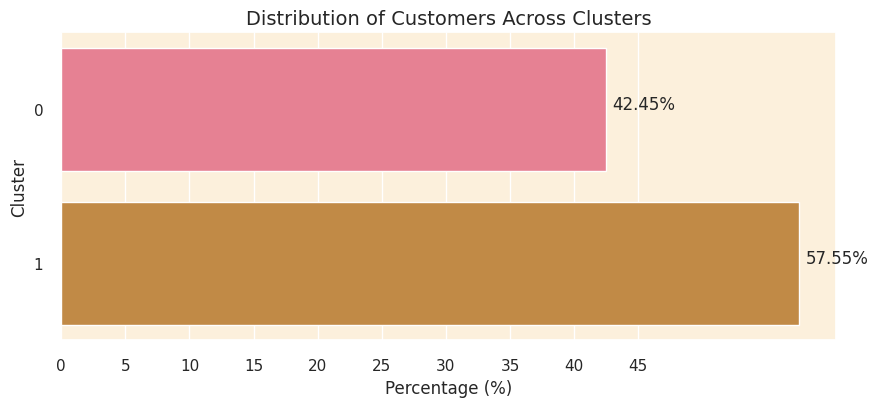

In [ ]:
 # Calculate the percentage of customers in each cluster
cluster_percentage = (RFM_scaled_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()


57.55% of airline customers are classified as Low-Value customers (Cluster 1), while 42.45% are classified as High-Value customers (Cluster 0). This indicates there is still good potential to increase the number of High-Value customers, as there is not a significant gap between the number of customers in the two groups.

## Cluster Characteristics

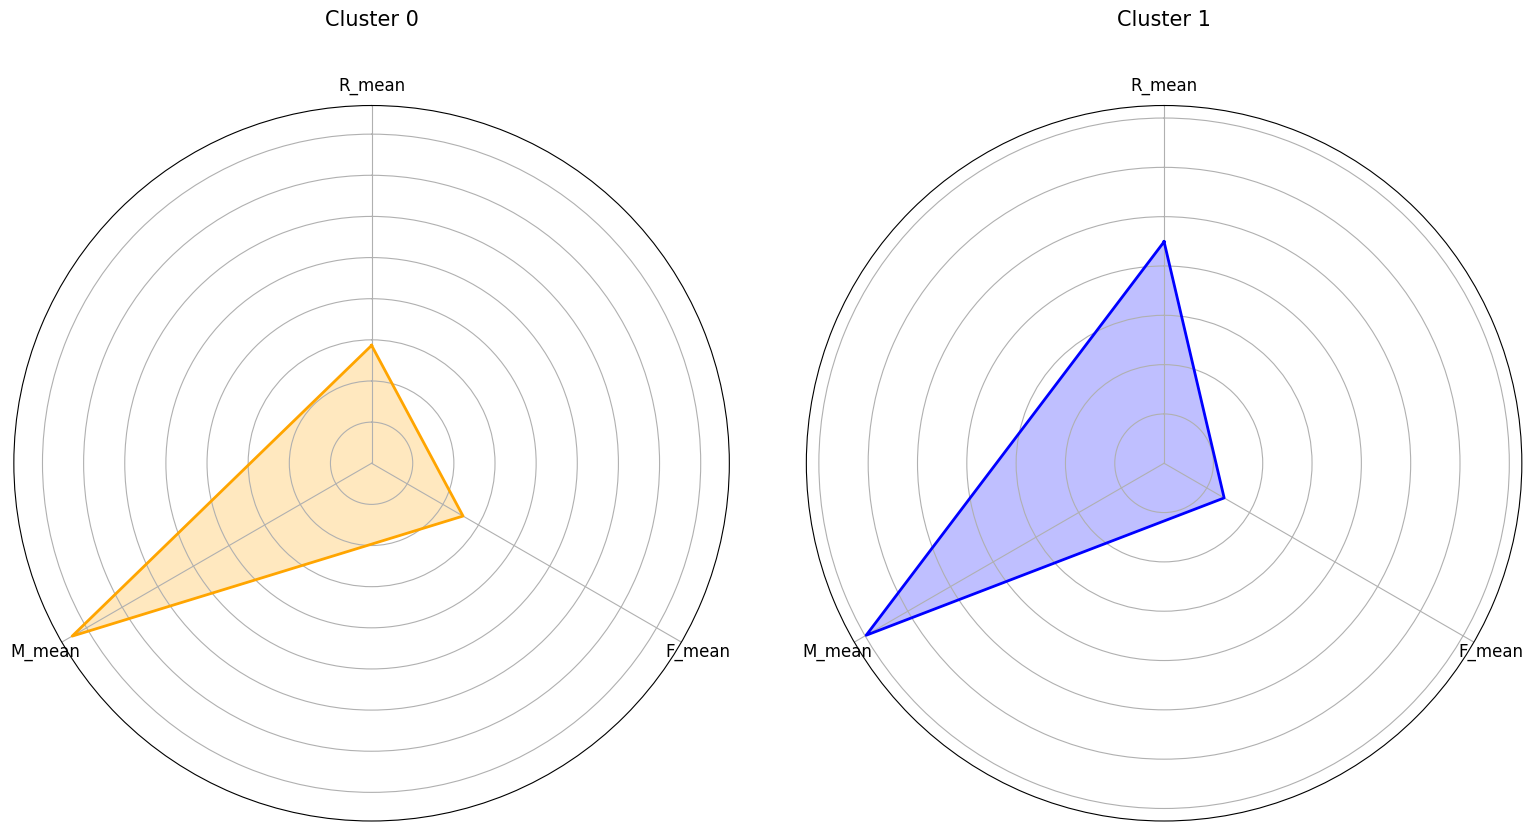

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the radar charts
labels = ['R_mean', 'F_mean', 'M_mean']
cluster_0 = [1.432229, 1.283357, 4.202056]
cluster_1 = [2.246072, 0.703111, 3.487693]

# Number of variables
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Function to create a radar chart
def create_radar_chart(ax, title, data, color):
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Plot data
    ax.fill(angles, data + data[:1], color=color, alpha=0.25)
    ax.plot(angles, data + data[:1], color=color, linewidth=2)

    # Add labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)

    # Add title
    ax.set_title(title, size=15, color='black', y=1.1)

# Create figure and axes
fig, axs = plt.subplots(ncols=2, figsize=(16, 8), subplot_kw=dict(polar=True))

# Create radar charts for each cluster
create_radar_chart(axs[0], 'Cluster 0', cluster_0, 'orange')
create_radar_chart(axs[1], 'Cluster 1', cluster_1, 'blue')

# Adjust layout
plt.tight_layout()
plt.show()

Detailed Analysis

1. Cluster 0:
*  Recency: Customers in this cluster have a lower recency score (1.43),
indicating they have flown more recently compared to Cluster 1.
* Frequency: They have a higher flight frequency (mean of 1.28), indicating more frequent engagement.
*   Monetary: Their average spending is higher (4.20), making them more valuable customers.

2. Cluster 1:
* Recency: This cluster has a higher recency score (2.25), indicating that they have not flown as recently as customers in Cluster 0.
*  Frequency: They have a lower flight frequency (mean of 0.70), indicating less frequent engagement.
*  Monetary: Their average spending is lower (3.49), making them less valuable compared to Cluster 0.